In [45]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
spam = pd.read_csv('C:/Users/Mark Naguib/AppData/Roaming/SPB_Data/spambase.data')
X =spam.iloc[:, :-1].values
t = spam.iloc[:, -1].values
np.random.seed(1862)#400121862
X_train,X_test,t_train,t_test=train_test_split(X,t,test_size=1/3,random_state=1862)

In [88]:
def decision_tree():
    from sklearn.model_selection import cross_val_score
    crosserr = np.empty(399)
    err = 0
    for n in range(2,401):
        clf = DecisionTreeClassifier(max_leaf_nodes=n, random_state=1862)
        clf = clf.fit(X_train, t_train)
        r = export_text(clf)
#        print("There are "+ str(n) +" leaf nodes:")
#        print(r)
        clf_predict = clf.predict(X_test)-t_test
        clf_score = cross_val_score(clf,X_test,t_test,cv=10)
        for i in range(10):
            err = err + cross_val_score(clf,X_test,t_test,cv=10)[i]
        err = err/10
        crosserr = np.append(crosserr,[err],axis=0)
    sort = np.argsort(crosserr)
    crosserr2=crosserr[sort[0]]*np.ones(5)
    return crosserr[398:-1]


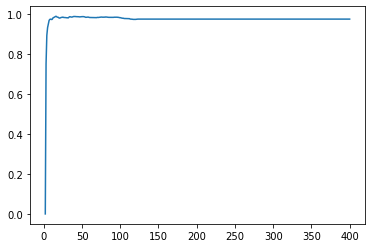

In [89]:
err1 = decision_tree()
x = []
for i in range(2,401):
    x.append(i)
plt.plot(x,err1)
plt.show()

In [60]:
def bagging():
    from sklearn.svm import SVC
    from sklearn.ensemble import BaggingClassifier
    from sklearn.datasets import make_classification
    err = np.empty(5)
    count = 0
    clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
    n_estimators=200, random_state=1862).fit(X_train, t_train)
    clf_predict = clf.predict(X_test)-t_test
    err = np.append(err,[clf.score(X_test,t_test)],axis=0)
    count=0
    clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
    n_estimators=400, random_state=1862).fit(X_train, t_train)
    clf_predict = clf.predict(X_test)-t_test
    err = np.append(err,[clf.score(X_test,t_test)],axis=0)
    count=0
    clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
    n_estimators=600, random_state=1862).fit(X_train, t_train)
    clf_predict = clf.predict(X_test)-t_test
    err = np.append(err,[clf.score(X_test,t_test)],axis=0)
    count=0
    clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
    n_estimators=800, random_state=1862).fit(X_train, t_train)
    clf_predict = clf.predict(X_test)-t_test
    err = np.append(err,[clf.score(X_test,t_test)],axis=0)
    count=0
    clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
    n_estimators=1000, random_state=1862).fit(X_train, t_train)
    clf_predict = clf.predict(X_test)-t_test
    err = np.append(err,[clf.score(X_test,t_test)],axis=0)
    count=0
    return err[4:9]

In [61]:
err2 = bagging()
print(err2)

[0.93089961 0.82007823 0.81877445 0.81747066 0.81681877]


In [50]:
def forest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.datasets import make_classification
    err = []
    count = 0
    clf2 = RandomForestClassifier(n_estimators = 200,random_state=1862)
    clf2.fit(X_train, t_train)
    clf2_predict=clf2.predict(X_test)-t_test
    for j in range(len(clf2.predict(X_test)-t_test)):
        if (clf2_predict[j]) != 0:
            count = count + 1
    err.append(count/len(X_test))
    count=0
    clf2 = RandomForestClassifier(n_estimators = 400,random_state=1862)
    clf2.fit(X_train, t_train)
    clf2_predict=clf2.predict(X_test)-t_test
    for j in range(len(clf2.predict(X_test)-t_test)):
        if (clf2_predict[j]) != 0:
            count = count + 1
    err.append(count/len(X_test))
    count=0
    clf2 = RandomForestClassifier(n_estimators = 600,random_state=1862)
    clf2.fit(X_train, t_train)
    clf2_predict=clf2.predict(X_test)-t_test
    for j in range(len(clf2.predict(X_test)-t_test)):
        if (clf2_predict[j]) != 0:
            count = count + 1
    err.append(count/len(X_test))
    count=0
    clf2 = RandomForestClassifier(n_estimators = 800,random_state=1862)
    clf2.fit(X_train, t_train)
    clf2_predict=clf2.predict(X_test)-t_test
    for j in range(len(clf2.predict(X_test)-t_test)):
        if (clf2_predict[j]) != 0:
            count = count + 1
    err.append(count/len(X_test))
    count=0
    clf2 = RandomForestClassifier(n_estimators = 1000,random_state=1862)
    clf2.fit(X_train, t_train)
    clf2_predict=clf2.predict(X_test)-t_test
    for j in range(len(clf2.predict(X_test)-t_test)):
        if (clf2_predict[j]) != 0:
            count = count + 1
    err.append(count/len(X_test))
    count=0
    return err

In [51]:
err3 = forest()
print(err3)

[0.05867014341590613, 0.058018252933507174, 0.05867014341590613, 0.056714471968709254, 0.05736636245110821]


In [52]:
def AdaBoost():
    from sklearn.ensemble import AdaBoostClassifier
    err=np.empty(5)
    count = 0
    clf3 = AdaBoostClassifier(base_estimator = None ,n_estimators = 200,random_state=1862,)
    clf3.fit(X_train, t_train)
    clf3_predict = clf3.predict(X_test)-t_test
    err=np.append(err,[clf3.score(X_test,t_test)],axis=0)
    count=0
    clf3 = AdaBoostClassifier(base_estimator = None ,n_estimators = 400,random_state=1862,)
    clf3.fit(X_train, t_train)
    clf3_predict = clf3.predict(X_test)-t_test
    err=np.append(err,[clf3.score(X_test,t_test)],axis=0)
    count=0
    clf3 = AdaBoostClassifier(base_estimator = None ,n_estimators = 600,random_state=1862,)
    clf3.fit(X_train, t_train)
    clf3_predict = clf3.predict(X_test)-t_test
    err=np.append(err,[clf3.score(X_test,t_test)],axis=0)
    count=0
    clf3 = AdaBoostClassifier(base_estimator = None ,n_estimators = 800,random_state=1862,)
    clf3.fit(X_train, t_train)
    clf3_predict = clf3.predict(X_test)-t_test
    err=np.append(err,[clf3.score(X_test,t_test)],axis=0)
    count=0
    clf3 = AdaBoostClassifier(base_estimator = None ,n_estimators = 1000,random_state=1862,)
    clf3.fit(X_train, t_train)
    clf3_predict = clf3.predict(X_test)-t_test
    err=np.append(err,[clf3.score(X_test,t_test)],axis=0)
    count=0
    return err[4:9]

In [59]:
err4 = AdaBoost()
print(err4)

[2.5e-323 3.0e-323 3.5e-323 4.0e-323 4.4e-323]
[4.44659081e-323 9.36114733e-001 9.38070404e-001 9.37418514e-001
 9.30899609e-001]


In [54]:
def AdaBoost2():
    from sklearn.ensemble import AdaBoostClassifier
    err = np.empty(5)
    count = 0
    clf4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes=10) ,n_estimators = 200,random_state=1862,)
    clf4.fit(X_train, t_train)
    clf4_predict = clf4.predict(X_test)-t_test
    for j in range (len(clf4.predict(X_test)-t_test)):
        if (clf4_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf4.score(X_test,t_test)],axis=0)
    count=0
    clf4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes=10) ,n_estimators = 400,random_state=1862,)
    clf4.fit(X_train, t_train)
    clf4_predict = clf4.predict(X_test)-t_test
    for j in range (len(clf4.predict(X_test)-t_test)):
        if (clf4_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf4.score(X_test,t_test)],axis=0)
    count=0
    clf4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes=10) ,n_estimators = 600,random_state=1862,)
    clf4.fit(X_train, t_train)
    clf4_predict = clf4.predict(X_test)-t_test
    for j in range (len(clf4.predict(X_test)-t_test)):
        if (clf4_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf4.score(X_test,t_test)],axis=0)
    count=0
    clf4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes=10) ,n_estimators = 800,random_state=1862,)
    clf4.fit(X_train, t_train)
    clf4_predict = clf4.predict(X_test)-t_test
    for j in range (len(clf4.predict(X_test)-t_test)):
        if (clf4_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf4.score(X_test,t_test)],axis=0)
    count=0
    clf4 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes=10) ,n_estimators = 1000,random_state=1862,)
    clf4.fit(X_train, t_train)
    clf4_predict = clf4.predict(X_test)-t_test
    for j in range (len(clf4.predict(X_test)-t_test)):
        if (clf4_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf4.score(X_test,t_test)],axis=0)
    count=0
    return err[4:9]

In [55]:
err5 = AdaBoost2()
print(err5)

[0.93089961 0.94263364 0.94263364 0.93611473 0.94263364]


In [56]:
def AdaBoost3():
    from sklearn.ensemble import AdaBoostClassifier
    err = np.empty(5)
    count = 0
    clf5 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier() ,n_estimators = 200,random_state=1862,)
    clf5.fit(X_train, t_train)
    clf5_predict = clf5.predict(X_test)-t_test
    for j in range (len(clf5.predict(X_test)-t_test)):
        if (clf5_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf5.score(X_test,t_test)],axis=0)
    count=0
    clf5 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier() ,n_estimators = 400,random_state=1862,)
    clf5.fit(X_train, t_train)
    clf5_predict = clf5.predict(X_test)-t_test
    for j in range (len(clf5.predict(X_test)-t_test)):
        if (clf5_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf5.score(X_test,t_test)],axis=0)
    count=0
    clf5 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier() ,n_estimators = 600,random_state=1862,)
    clf5.fit(X_train, t_train)
    clf5_predict = clf5.predict(X_test)-t_test
    for j in range (len(clf5.predict(X_test)-t_test)):
        if (clf5_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf5.score(X_test,t_test)],axis=0)
    count=0
    clf5 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier() ,n_estimators = 800,random_state=1862,)
    clf5.fit(X_train, t_train)
    clf5_predict = clf5.predict(X_test)-t_test
    for j in range (len(clf5.predict(X_test)-t_test)):
        if (clf5_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf5.score(X_test,t_test)],axis=0)
    count=0
    clf5 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier() ,n_estimators = 1000,random_state=1862,)
    clf5.fit(X_train, t_train)
    clf5_predict = clf5.predict(X_test)-t_test
    for j in range (len(clf5.predict(X_test)-t_test)):
        if (clf5_predict[j]) != 0:
            count = count + 1
    err = np.append(err,[clf5.score(X_test,t_test)],axis=0)
    count=0
    return err[4:9]

In [57]:
err6 = AdaBoost3()
print(err6)

[0.94263364 0.94393742 0.94393742 0.94393742 0.94393742]


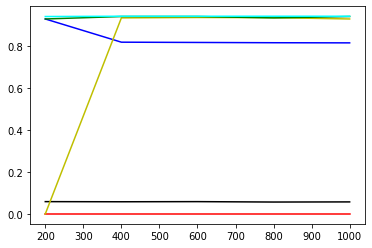

In [77]:
import matplotlib.pyplot as plt
estimator = [200,400,600,800,1000]
plt.plot(estimator,err1,'r',estimator,err2,'b',estimator,err3,'k',estimator,err4,'y',estimator,err5,'g',estimator,err6,'cyan')
plt.show()